<center><br><font size=10>Final Project</font><br>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Asaf Biniamini & Guy Maoz
<br><i>Spring 2023</i> </center>

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

#My imports: 
import seaborn as sns
import jinja2 as jnj

In [3]:
# load
data = pd.read_csv("train.csv")
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (60000, 23), y.shape: (60000,)


# Part 1: Explorization

In [9]:
#Get a first look on the data set
# data.head()
# data.tail()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sha256               60000 non-null  object 
 1   size                 60000 non-null  int64  
 2   vsize                58065 non-null  float64
 3   imports              58261 non-null  float64
 4   exports              57907 non-null  float64
 5   has_debug            57073 non-null  float64
 6   has_relocations      56676 non-null  float64
 7   has_resources        58039 non-null  float64
 8   has_signature        58063 non-null  float64
 9   has_tls              57102 non-null  float64
 10  symbols              57344 non-null  float64
 11  numstrings           57282 non-null  float64
 12  paths                56340 non-null  float64
 13  urls                 57651 non-null  float64
 14  registry             57475 non-null  float64
 15  MZ                   56911 non-null 

In [16]:
pd.set_option('display.max_columns', None)
data.describe()

,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
count,6.000000e+04,5.806500e+04,58261.000000,57907.000000,57073.000000,56676.000000,58039.000000,58063.000000,57102.000000,57344.000000,5.728200e+04,56340.000000,57651.000000,57475.000000,56911.000000,5.726100e+04,57243.000000,60000.000000,56296.000000,56249.000000,60000.000000
mean,1.501019e+06,1.965704e+06,106.195671,30.803271,0.403764,0.543069,0.860456,0.254189,0.234195,40.172468,7.404344e+03,1.644799,12.501292,0.429282,16.263429,1.207710e+05,32.658511,53.678748,4.015404,5.810361,0.500000
std,4.727391e+06,2.017881e+07,213.452315,508.079533,0.490655,0.498146,0.346516,0.435408,0.423498,1239.701661,2.463088e+04,37.003752,71.631716,11.496862,82.193088,6.052203e+05,1094.710748,20.632479,6.368440,0.641208,0.500004
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,5.000000e+00,5.000000,17.500000,-17.783199,0.004929,0.000000
25%,1.070080e+05,1.228800e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.750000e+02,0.000000,0.000000,0.000000,1.000000,6.013000e+03,7.447368,38.400000,-0.293525,5.469978,0.000000
50%,4.833280e+05,4.218880e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.990500e+03,0.000000,0.000000,0.000000,4.000000,2.283500e+04,12.009456,43.300000,3.658333,5.856659,0.500000
75%,1.239326e+06,1.601536e+06,152.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.172000e+03,1.000000,10.000000,0.000000,11.000000,7.615600e+04,17.310647,69.100000,7.863973,6.344090,1.000000
max,3.253537e+08,4.278288e+09,15047.000000,48840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,181660.000000,1.572261e+06,5324.000000,9387.000000,2492.000000,7010.000000,5.034687e+07,207990.925620,100.000000,43.926598,6.584937,1.000000


#### Conclusion from the describe table
1. We can see that the 5 "has_###" features are (as expected) a binary variables. So we can change they're type to be boolean to emphasize that and deal with them differntly.
2. We also noticed that the labels mean value is exactly 0.5, which means that we have same numbers of '1' labels as '0' labels. so based on it we can conclude that the probability to get malicious file is the same as the probability to get non malicious file.
3. We have noticed most of the continous features has a very large differnece between the 75th percentile value to the max value. like 'eports' for example that has '0' value in it 75th percentile and '48840' max value. This can light some warning signs that the outliars affects the histograms that we saw before and made problems to notice how feature is distribute.

Now I want to get some data on each feature and try to understand them


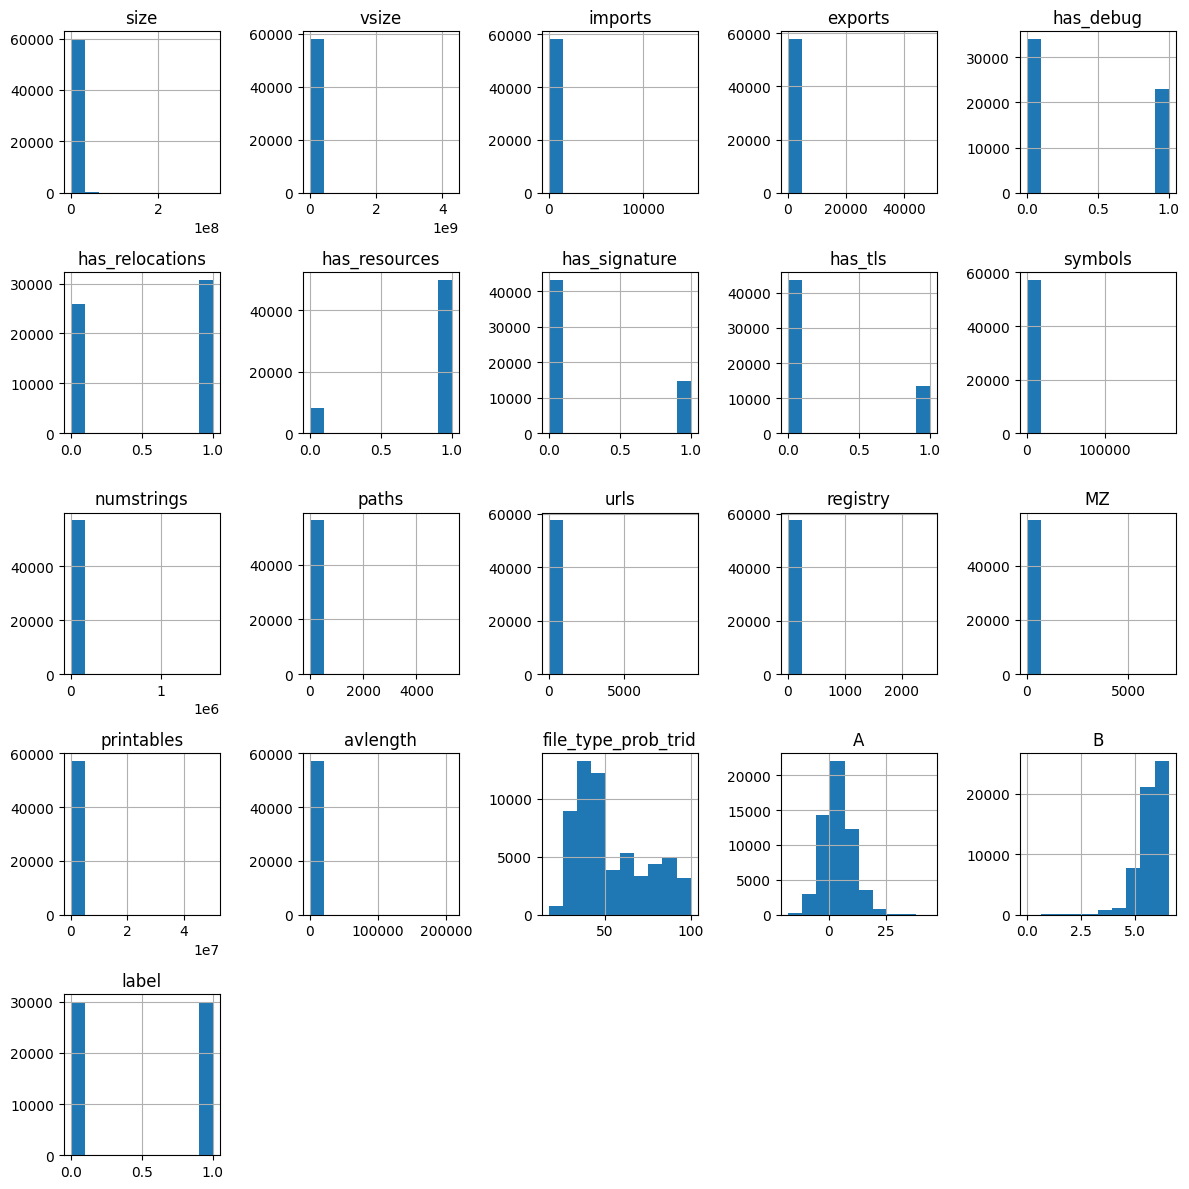

In [15]:
data.drop("sha256", axis=1).hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

By the describe method, we can start to understand which feutres are binary feutres and which are continous variables.
In addition, we can see that the label mean is 0.5 exactly, so we can expect to see the same number of corrupted files as uncorrepted files.

### Dealing with missing data

Identify Missing Data

In [29]:
# Check the number of NULL values of each feature: 
data.isnull().sum()

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
label                     0
dtype: int64

Try to remove rows with missing data

In [28]:
new_data = data.dropna()
new_data.shape()

TypeError: 'tuple' object is not callable

C:\Users\GuyMaoz\AppData\Local\Temp\ipykernel_16988\3464680837.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


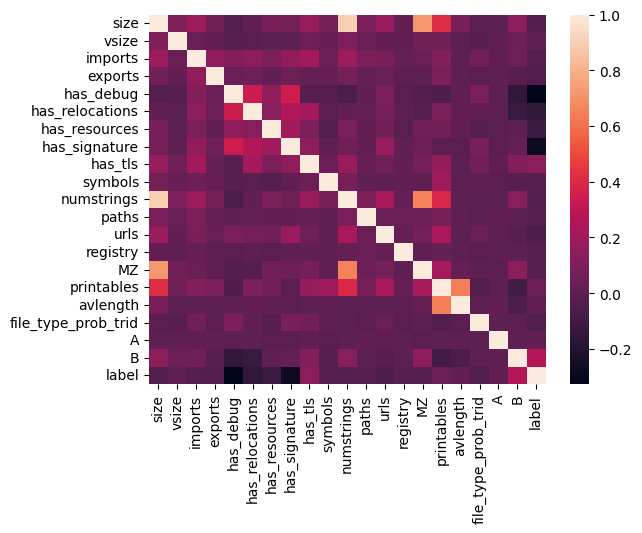

In [7]:
# Check the corellation between features:
corr_matrix = data.corr()
corr_heatmap = sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

We can see that most of the features does *not* have high correlation between one another.
But there are some that does have high correlation and maybe should be removed.

In [36]:
# get upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.85

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f'Features to drop are: {to_drop}')

# drop highly correlated features

data_after_drop = data.drop(to_drop, axis=1, inplace=False)
print(f'new data columns: \n {data_after_drop.columns}')

Features to drop are: ['numstrings']
new data set: 
 Index(['sha256', 'size', 'vsize', 'imports', 'exports', 'has_debug',
       'has_relocations', 'has_resources', 'has_signature', 'has_tls',
       'symbols', 'paths', 'urls', 'registry', 'MZ', 'printables', 'avlength',
       'file_type_trid', 'file_type_prob_trid', 'A', 'B', 'C', 'label'],
      dtype='object')


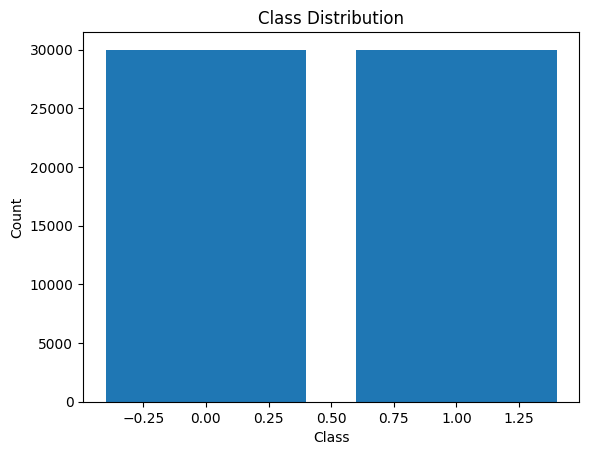

In [4]:
# Plot a bar chart of class distribution
class_counts = pd.Series(y).value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


C:\Users\asafb\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asafb\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


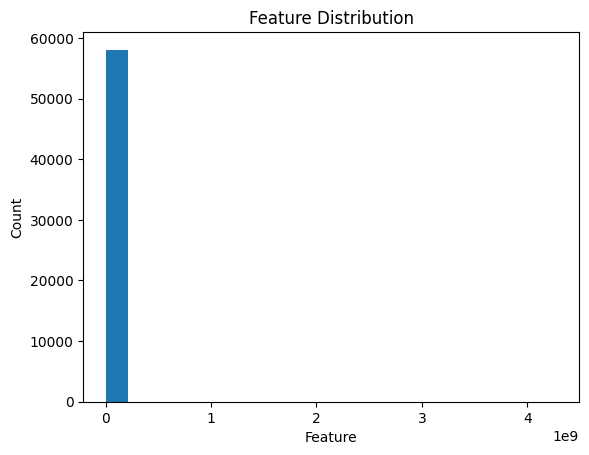

In [6]:
# Plot a histogram of a numeric feature
plt.hist(X[:, 2], bins=20)  # Replace 0 with the index of the feature you want to plot
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Feature Distribution')
plt.show()


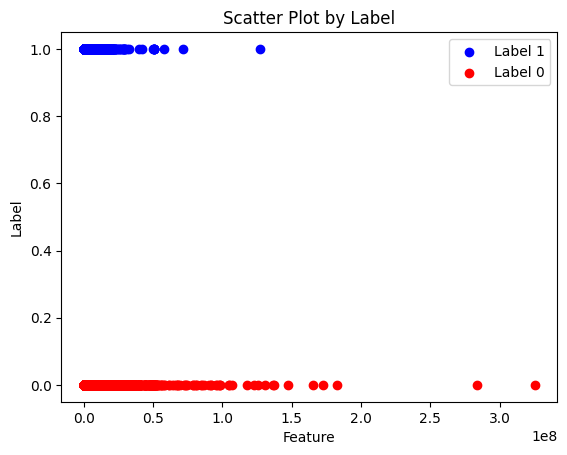

In [8]:


# Separate examples based on labels
label_1_examples = X[y == 1]
label_0_examples = X[y == 0]

# Plot the feature of interest for label 1 examples
plt.scatter(label_1_examples[:, 1], [1] * len(label_1_examples), color='blue', label='Label 1')

# Plot the feature of interest for label 0 examples
plt.scatter(label_0_examples[:, 1], [0] * len(label_0_examples), color='red', label='Label 0')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Scatter Plot by Label')
plt.legend()
plt.show()
